In [1]:
#SAR Project
#Nathan COHEN - LEROY Thibault - CUZOU Alexandre

In [21]:
PORT = 8001

import requests

import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [14]:
# Make a request to create a new simulation
def init(sim_id = 'sim1'):
    url = f'http://127.0.0.1:{PORT}/control/poll/create_from_example/{sim_id}'
    response = requests.post(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Next Step")

# Make a request to run one step
def next_step():
    url = f'http://127.0.0.1:{PORT}/control/poll/run_one_step'
    response = requests.post(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Next Step")
        
# Make a request to get the current funds available
def get_next_point_funds():
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/inventory'
    response = requests.get(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Funds : {jresponse['funds_in_eur']}")
        return jresponse['funds_in_eur']
    else:
        return None

# Make a request to get the inventory
def get_next_points_inventory():
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/inventory'
    response = requests.get(url)
    if response.status_code == requests.codes.ok :
        jresponse = response.json()
        print(jresponse)

# Make a request to get the market prices
def get_next_points_market_price():
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/market_price'
    response = requests.get(url)
    if response.status_code == requests.codes.ok :
        jresponse = response.json()
        print(jresponse)

# Make a request to get the total value of all the assets in inventory
def get_next_point_assets_in_inventory():
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/inventory'
    response = requests.get(url)
    url2 = f'http://127.0.0.1:{PORT}/enterprise/poll/market_price'
    response2 = requests.get(url2)
    if response.status_code == requests.codes.ok and response2.status_code == requests.codes.ok:
        jresponse = response.json()
        jresponse2 = response2.json()
        dict_prices = {}
        total_value = 0
        for article in jresponse2 :
            name = article['item']['name']
            dict_prices[name] = article['unit_price']
        if type(jresponse) == dict : # if there is only one kind of article in inventory at the moment
            item_name = jresponse['item_quantities'][0]['item']['name']
            item_quantity = jresponse['item_quantities'][0]['quantity']
            total_value += dict_prices[item_name] * item_quantity
        elif type(jresponse) == list : #if there is more than one kind
            for article_type in jresponse :
                item_name = article_type['item_quantities'][0]['item']['name']
                item_quantity = article_type['item_quantities'][0]['quantity']
                total_value += dict_prices[item_name] * item_quantity                                                            
        return total_value

# Make a request to get the status of all machines
def get_next_point_machine_status():
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/machine'
    response = requests.get(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        response_list = []
        
        #We consider each element of the list jresponse machine
        for i in range(len(jresponse)):
            print(f"Status of machine : {jresponse[i]['operating_efficiency_percentage']}")
            response_list.append(jresponse[i]['operating_efficiency_percentage'])
        return response_list, len(jresponse)
    else:
        return None

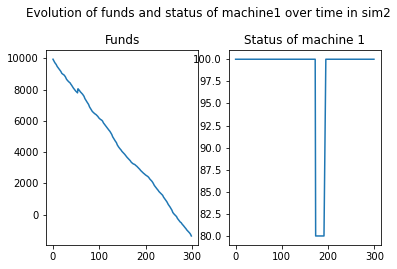

In [20]:
# List holding the x values
data_x = []
# List holding the y values
data_y_funds = []
#data_y_assets = []
data_y_machine1 = []

sim = 'sim2' #choose 'sim1', 'sim2' or 'sim3'
# Create sim
init(sim)

for x in range(0, 300):
    next_step() # Do one step
    y_funds = get_next_point_funds() # Request a new value and store in y_funds
    #y_assets = get_next_point_assets_in_inventory() # Request a new value and store in y_assets
    y_machine1 = get_next_point_machine_status()[0][0]

    data_x.append(x)  # Add the current x to the list
    data_y_funds.append(y_funds) # Add the current y_funds to the list
    data_y_machine1.append(y_machine1) # Add the current y_machine1 to the list
    #data_y_assets.append(y_assets) # Add the current y_assets to the list
    
    fig, (ax1, ax2) = plt.subplots(1,2)

    clear_output(wait=True) # Clear / remove whatever was already plotted before
    ax1.plot(data_x, data_y_funds) # Re-plot the data with the new added values in the list
    ax1.set_title('Funds')
    ax2.plot(data_x, data_y_machine1)
    ax2.set_title('Status of machine 1')
    st = fig.suptitle(f'Evolution of funds and status of machine1 over time in {sim}') # Set title of the whole figure
    
    
    st.set_y(0.95) # Put the suptitle at the top
    fig.subplots_adjust(top=0.8) # Shift subplots down
    
    plt.show() # Make sure to display the new plot, to make it visible
    time.sleep(0.1) # Wait 0.1 seconds before the next request